# **ML LAB 6**

## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.drop(['Age','Gender'],axis=1,inplace=True)


In [5]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0,1))
data = mms.fit_transform(df)
cols = df.columns[:]
df = pd.DataFrame(data=data, columns=cols)
df.head(4)

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0
1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1.0
2,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1.0
3,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1.0


In [6]:
d = df.values
d

array([[0.00402145, 0.        , 0.06057645, ..., 0.52173913, 0.24      ,
        1.        ],
       [0.14075067, 0.2755102 , 0.31069858, ..., 0.5       , 0.176     ,
        1.        ],
       [0.0924933 , 0.20408163, 0.20859795, ..., 0.52173913, 0.236     ,
        1.        ],
       ...,
       [0.00536193, 0.00510204, 0.0889106 , ..., 0.5       , 0.28      ,
        1.        ],
       [0.01206434, 0.02040816, 0.05911089, ..., 0.54347826, 0.28      ,
        1.        ],
       [0.0080429 , 0.01020408, 0.07474353, ..., 0.76086957, 0.48      ,
        0.        ]], shape=(583, 9))

In [7]:
x = d[:,:-1]
y = d[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
l_reg = LogisticRegression()
l_reg.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred = l_reg.predict(x_train)
acc_lr = accuracy_score(y_pred, y_train)
acc_lr

0.7253218884120172

## **K-Fold Cross Validation**

In [11]:
from sklearn.model_selection import KFold, cross_val_score

k_f_val = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(l_reg, x_train, y_train, scoring='accuracy', cv=k_f_val)
results

array([0.81914894, 0.72043011, 0.74193548, 0.70967742, 0.6344086 ])

In [12]:
np.mean(results)


np.float64(0.7251201098146878)

## **Stratified K-Fold Cross Validation**

In [13]:
from sklearn.model_selection import StratifiedKFold

skf_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results_skf = cross_val_score(l_reg, x_train, y_train, scoring='accuracy', cv=skf_val)
results_skf

array([0.72340426, 0.72043011, 0.72043011, 0.7311828 , 0.7311828 ])

In [14]:
results_skf.mean()

np.float64(0.7253260123541525)

## **Performance Measures**

In [15]:
y_pred_test = l_reg.predict(x_test)
accuracy_score(y_pred_test, y_test)

0.6666666666666666

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 0, 39],
       [ 0, 78]])

In [17]:
ps = precision_score(y_test, y_pred_test)
ps

0.6666666666666666

In [18]:
rs = recall_score(y_test, y_pred_test)
rs

1.0

In [19]:
f1s = f1_score(y_test, y_pred_test)
f1s

0.8

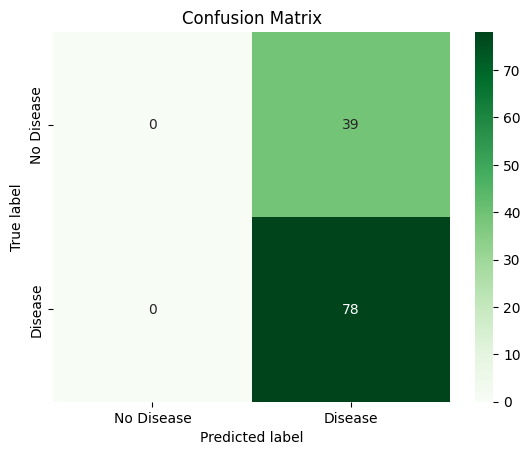

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


## **Decision Tree - logistic Regression**

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
pred = dtc.predict(x_test)
accuracy_score(pred, y_test)

0.5982905982905983

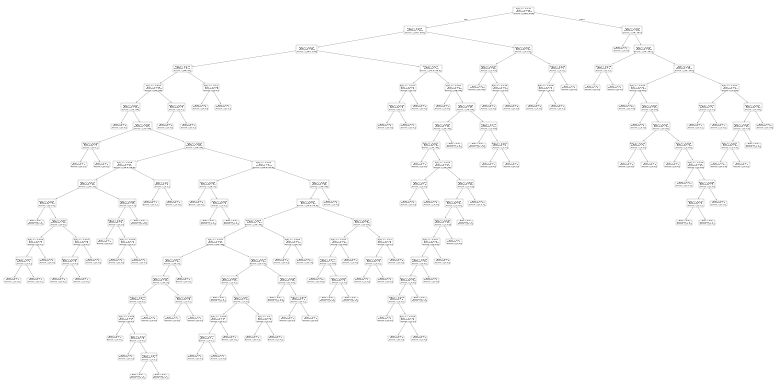

In [23]:
plt.figure(figsize=(100,50), dpi=10)
plot_tree(dtc)
plt.show()

## **Decision Tree - Linear Regression**

In [24]:
df2 = pd.read_csv("Book1.csv")
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [25]:
df2.drop(['furnishingstatus'], axis=1, inplace=True)

In [26]:
mms = MinMaxScaler(feature_range=(0,1))
d = mms.fit_transform(df2)
cols = df2.columns[:]
df2 = pd.DataFrame(data=d, columns=cols)
df2.head(4)

,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.356777,0.50,0.333333,0.666667,0.666667
1,0.880096,0.469597,0.50,1.000000,1.000000,1.000000
2,0.880096,0.542857,0.25,0.333333,0.333333,0.666667
3,0.876099,0.362637,0.50,0.333333,0.333333,1.000000


In [27]:
x = df2.values[:,1:]
y = df2.values[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtc_linreg = DecisionTreeRegressor()
dtc_linreg.fit(x_train, y_train)

DecisionTreeRegressor()

In [29]:
pred = dtc_linreg.predict(x_test)
mean_squared_error(pred, y_test)

0.0006402397992727658

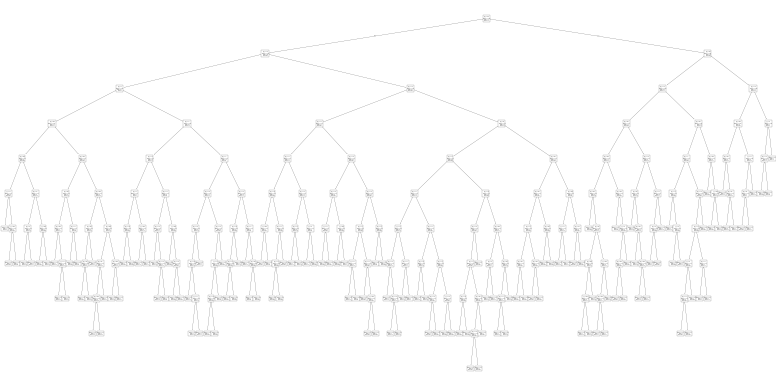

In [30]:
plt.figure(figsize=(100,50), dpi=10)
plot_tree(dtc_linreg)
plt.show()

## **Hyperparameter Tuning: Grid Search**

In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
df = pd.read_csv('liver_patient.csv')
df.head(4)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [33]:
df.drop('Gender', axis=1, inplace=True)


In [34]:
mms = MinMaxScaler()
x = mms.fit_transform(df)
X = x[:, 0:9]
Y = x[:, 9]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
param_grid = {
 'max_depth': [3, 5, 10],
 'min_samples_leaf': [1, 5, 10, 20]
 }

In [37]:
dt_model = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Best Parameters:", best_params)
print("Best Estimator:", best_model)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Best Estimator: DecisionTreeClassifier(max_depth=3, random_state=0)
Best Cross-validation Accuracy: 0.6759780370624571
Test Accuracy: 0.717948717948718
